In [44]:
import glob
import pandas as pd
import json
import requests

In [68]:
import pandas as pd

df1 = pd.read_excel("C:/Users/Rajasekar/Downloads/House_Rent_Train.xlsx")
df2 = pd.read_excel("C:/Users/Rajasekar/Downloads/House_Rent_Test.xlsx")
df1
df2

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies
0,ff8081815df539bc015df947ce976cca,BHK2,Basavanagudi,22-08-2017 09:00,12.941603,77.568156,FAMILY,0,1,0,...,1,2,N,2,3,3,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,1
1,ff80818157288e9301572c05651853a6,BHK2,Rajaji Nagar,17-09-2017 16:33,12.998803,77.561887,ANYONE,0,0,0,...,7,1,S,2,0,3,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IF,0
2,ff8081815f1afc58015f1b831fde166e,BHK1,Jeevan Bima Nagar,14-04-2018 17:27,12.966467,77.661063,ANYONE,0,0,0,...,10,1,S,1,0,1,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IF,0
3,ff8081816035b31901603f7922c046e0,BHK1,Jayanagar 1st Block,2017-11-12 13:15:00,12.941533,77.592606,ANYONE,0,0,0,...,8,1,E,0,2,2,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IF,0
4,ff8081815c3582f5015c38fc31aa73a4,BHK3,Whitefield Hope Farm Junction,2017-11-07 16:44:00,12.971083,77.751625,ANYONE,1,1,1,...,0,3,E,3,3,4,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",BOREWELL,AP,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,ff8081815216f51101521aa9d46c191f,BHK2,Hanumanthnagar,2018-10-06 18:22:00,12.941654,77.559999,FAMILY,0,0,0,...,2,2,N,2,3,3,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IF,2
4496,ff8081816098166901609bf52bb702a8,BHK2,Lakkasandra,21-01-2018 14:36,12.942973,77.597738,ANYONE,0,0,0,...,10,1,N,2,2,3,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IF,1
4497,ff808181629ac9860162a7ac1a4253bb,BHK1,"Jeevan Samskruthi Apartment, Shiridi Sai Templ...",30-05-2018 16:10,12.949315,77.713807,ANYONE,0,0,0,...,10,1,W,1,2,3,"{""SC"":false,""INTERCOM"":false,""AC"":false,""PB"":f...",CORP_BORE,IH,0
4498,ff8081815b57c717015b580af22f1bbd,BHK3,Mullur,2018-11-07 16:17:00,12.914104,77.716428,FAMILY,1,1,1,...,1,3,N,4,10,10,"{""SC"":false,""INTERCOM"":true,""AC"":false,""PB"":tr...",BOREWELL,AP,3


In [69]:
df1.isnull().sum()

id                   0
type                27
locality           160
activation_date     23
latitude            23
longitude           23
lease_type          23
gym                  0
lift                 0
swimming_pool        0
negotiable           0
furnishing           0
parking              0
property_size        0
property_age        23
bathroom            23
facing              23
cup_board           23
floor               23
total_floor         23
amenities           23
water_supply        23
building_type       23
balconies           23
rent                23
dtype: int64

In [70]:
df1 = df1.dropna()

In [71]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20377 entries, 1 to 20531
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20377 non-null  object 
 1   type             20377 non-null  object 
 2   locality         20377 non-null  object 
 3   activation_date  20377 non-null  object 
 4   latitude         20377 non-null  float64
 5   longitude        20377 non-null  float64
 6   lease_type       20377 non-null  object 
 7   gym              20377 non-null  int64  
 8   lift             20377 non-null  int64  
 9   swimming_pool    20377 non-null  int64  
 10  negotiable       20377 non-null  int64  
 11  furnishing       20377 non-null  object 
 12  parking          20377 non-null  object 
 13  property_size    20377 non-null  int64  
 14  property_age     20377 non-null  float64
 15  bathroom         20377 non-null  float64
 16  facing           20377 non-null  object 
 17  cup_board        

In [72]:
# Display summary statistics for numeric columns
print(df1.describe())

           latitude     longitude           gym          lift  swimming_pool  \
count  20377.000000  20377.000000  20377.000000  20377.000000   20377.000000   
mean      12.945750     77.637238      0.226235      0.361142       0.174461   
std        0.029587      0.110758      0.418404      0.480344       0.379515   
min       12.900004     77.500072      0.000000      0.000000       0.000000   
25%       12.918232     77.571912      0.000000      0.000000       0.000000   
50%       12.943792     77.633367      0.000000      0.000000       0.000000   
75%       12.970922     77.695692      0.000000      1.000000       0.000000   
max       12.999999     80.266346      1.000000      1.000000       1.000000   

         negotiable  property_size  property_age      bathroom     cup_board  \
count  20377.000000   20377.000000  20377.000000  20377.000000  20377.000000   
mean       0.711488    1061.437209      5.777053      1.857732      4.567503   
std        0.453081     591.857798     

C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


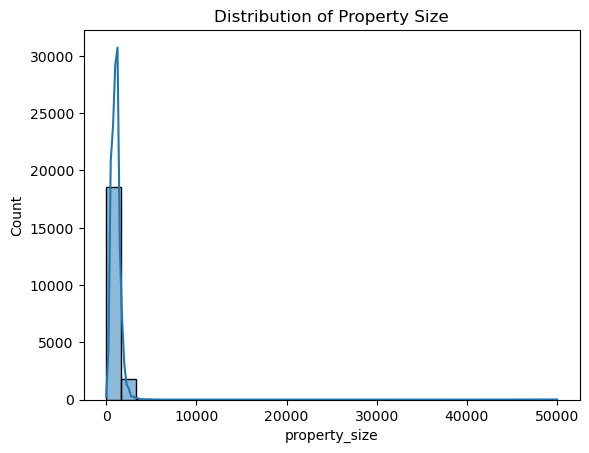

C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


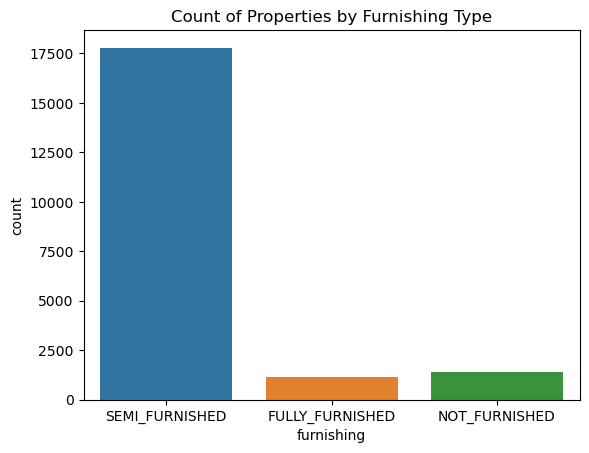

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Numeric Variables
sns.histplot(df1['property_size'], bins=30, kde=True)
plt.title('Distribution of Property Size')
plt.show()

# Categorical Variables
sns.countplot(x='furnishing', data=df1)
plt.title('Count of Properties by Furnishing Type')
plt.show()

C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


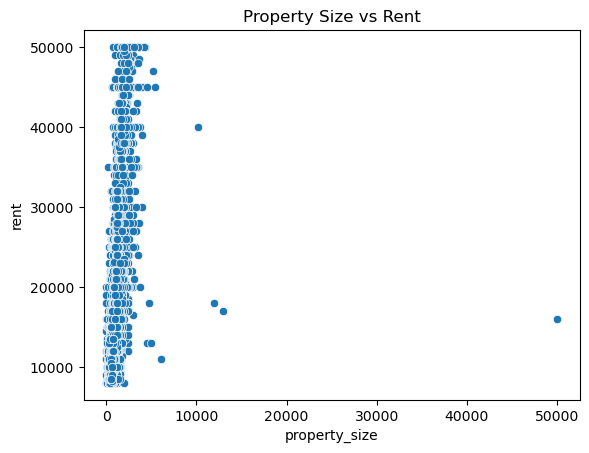

C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


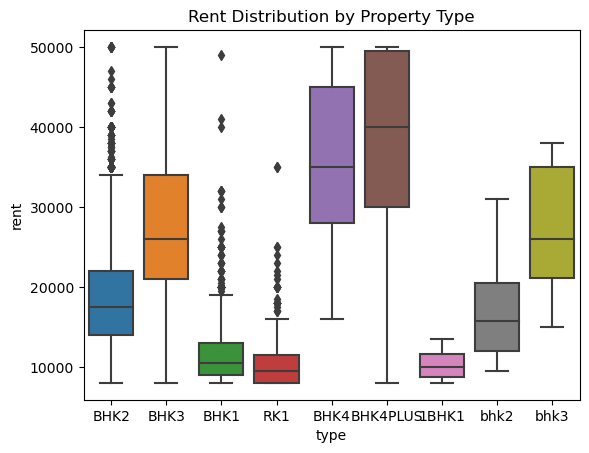

In [74]:
# Scatter plot for property size and rent
sns.scatterplot(x='property_size', y='rent', data=df1)
plt.title('Property Size vs Rent')
plt.show()

# Box plot for rent based on the type of property
sns.boxplot(x='type', y='rent', data=df1)
plt.title('Rent Distribution by Property Type')
plt.show()

C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Rajasekar\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


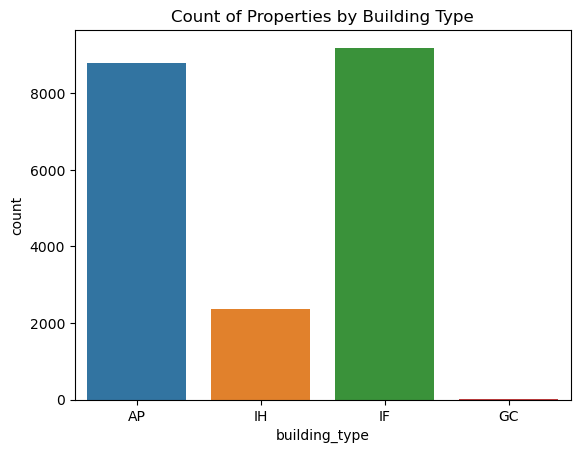

In [75]:
# Count plots for categorical variables
sns.countplot(x='building_type', data=df1)
plt.title('Count of Properties by Building Type')
plt.show()

In [76]:
# Convert the 'activation_date' column to datetime format first
df1['activation_date'] = pd.to_datetime(df1['activation_date'])

# Extract the year from the 'activation_date' column using apply and lambda
df1['activation_year'] = df1['activation_date'].apply(lambda x: x.year)

# Print the first few rows of the DataFrame to verify
print(df1[['activation_date', 'activation_year']].head())

      activation_date  activation_year
1 2017-09-10 12:48:00             2017
2 2018-12-06 22:02:00             2018
3 2018-07-20 16:22:00             2018
4 2018-05-31 17:41:00             2018
5 2017-10-24 18:29:00             2017


In [77]:
# Drop the specified columns only if they exist in the DataFrame
columns_to_drop = ['id', 'activation_date']
columns_to_drop = [col for col in columns_to_drop if col in df1.columns]  # Filter out columns that don't exist

df1 = df1.drop(columns=columns_to_drop)

# Print the first few rows of the updated DataFrame
print(df1.head())

   type              locality   latitude  longitude lease_type  gym  lift  \
1  BHK2             Bellandur  12.929557  77.672280     ANYONE    0     1   
2  BHK3         Thiruvanmiyur  12.982870  80.262012     FAMILY    0     1   
3  BHK1             Attiguppe  12.955991  77.531634     FAMILY    0     0   
4  BHK3             Kodihalli  12.963903  77.649446     FAMILY    0     0   
5  BHK1  Seetharampalya,Hoodi  12.986196  77.718314     FAMILY    1     1   

   swimming_pool  negotiable      furnishing  ... facing  cup_board  floor  \
1              0           1  SEMI_FURNISHED  ...     NE        2.0    3.0   
2              0           0  SEMI_FURNISHED  ...      E        3.0    1.0   
3              0           1  SEMI_FURNISHED  ...      E        1.0    1.0   
4              0           1  SEMI_FURNISHED  ...      E        4.0    0.0   
5              1           1  SEMI_FURNISHED  ...      E        1.0    3.0   

   total_floor                                          amenities  \

In [78]:
#Handeling ordinal Data and norminal data
#ordinal :type,locality,lease_type,facing,furnishing,water_supplyand ,parkingand building_type
#normal :locality

In [79]:
from sklearn.preprocessing import LabelEncoder

ordinal_columns = ['type', 'lease_type', 'facing', 'furnishing', 'water_supply','parking','building_type']

label_encoder = LabelEncoder()
for col in ordinal_columns:
    df1[col] = label_encoder.fit_transform(df1[col])

In [80]:
df1 = pd.get_dummies(df1, columns=['locality'], drop_first=True)

In [81]:
df1 = df1.drop(columns=['amenities'])

In [82]:
#corrilation

In [83]:
df3=df1[['type', 'latitude', 'longitude', 'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable', 'furnishing', 'parking', 'property_size', 'property_age', 'bathroom', 'facing', 'cup_board', 'floor', 'water_supply', 'building_type', 'balconies', 'rent', 'activation_year']]

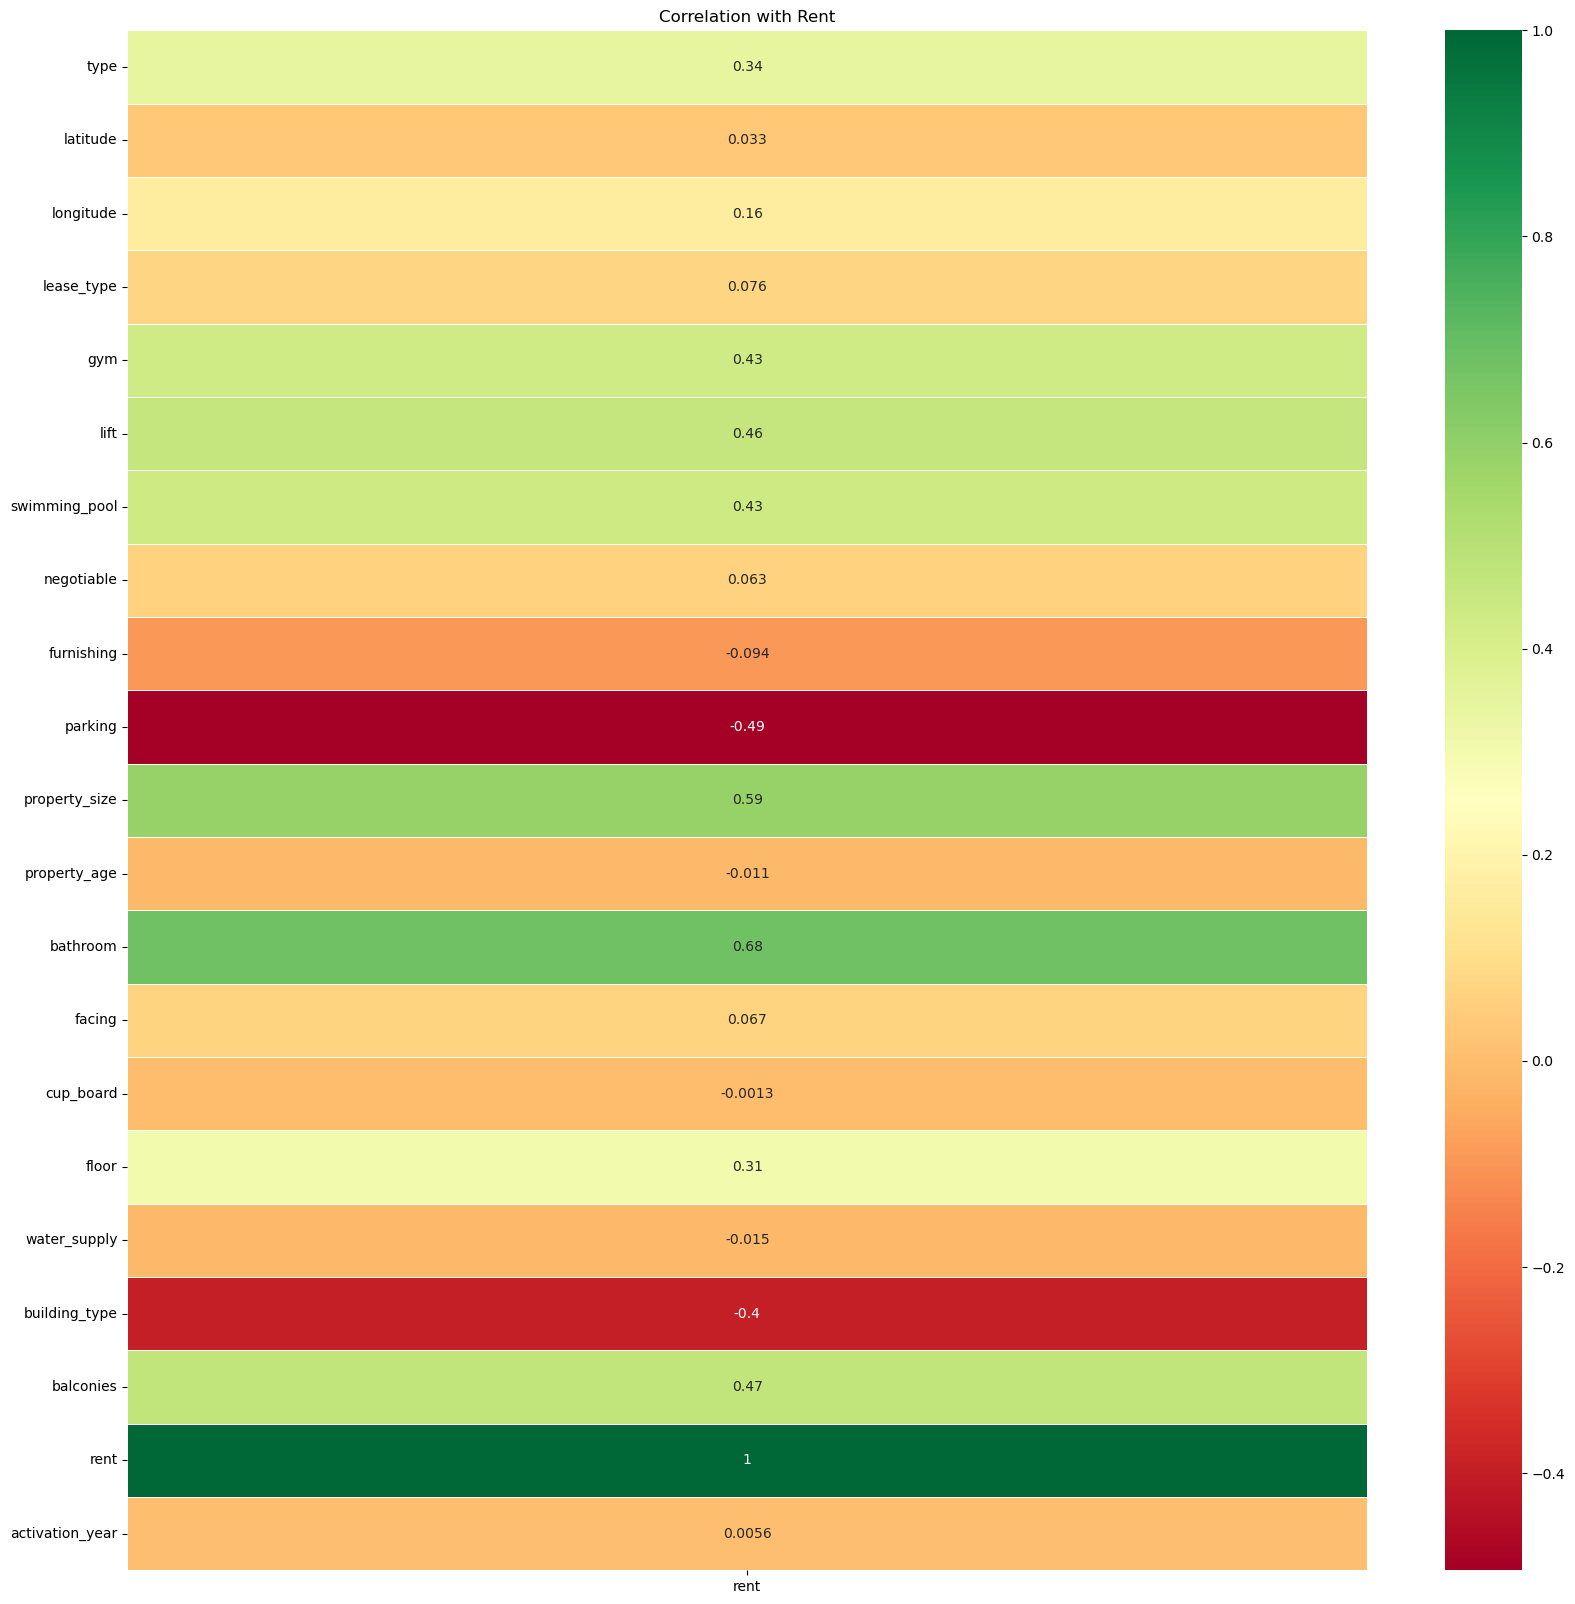

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 20))
correlation_matrix = df3.corr()

# Filter the correlation matrix to show only the correlation with 'rent'
rent_correlation = correlation_matrix[['rent']]

# Create a heatmap
sns.heatmap(rent_correlation, annot=True, cmap="RdYlGn", linewidths=.5)
plt.title('Correlation with Rent')
plt.show()

In [85]:
from sklearn.preprocessing import LabelEncoder

ordinal_columns = ['type', 'lease_type', 'facing', 'furnishing', 'water_supply','parking','building_type']

label_encoder = LabelEncoder()
for col in ordinal_columns:
    df2[col] = label_encoder.fit_transform(df2[col])

df2 = df2.drop(columns=['amenities'])

In [86]:
from math import radians, sin, cos, sqrt, atan2
import pandas as pd

# Assuming your DataFrame is df3
# Replace 'your_latitude_column' and 'your_longitude_column' with the actual column names in your DataFrame.

central_point_1 = {'latitude': 13.0827, 'longitude': 80.2707}
central_point_2 = {'latitude': 12.9716, 'longitude': 77.5946}

# Function to calculate Haversine distance
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in kilometers
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat / 2) ** 2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

# Calculate distances from both central points and create new features
df1['distance_from_center_1'] = df1.apply(lambda row: haversine_distance(central_point_1['latitude'], central_point_1['longitude'], radians(row['latitude']), radians(row['longitude'])), axis=1)

df1['distance_from_center_2'] = df1.apply(lambda row: haversine_distance(central_point_2['latitude'], central_point_2['longitude'], radians(row['latitude']), radians(row['longitude'])), axis=1)

# Display the updated DataFrame
print(df1[['latitude', 'longitude', 'distance_from_center_1', 'distance_from_center_2']])


        latitude  longitude  distance_from_center_1  distance_from_center_2
1      12.929557  77.672280             8801.563260             8511.392645
2      12.982870  80.262012             8796.648017             8506.477559
3      12.955991  77.531634             8801.817128             8511.646496
4      12.963903  77.649446             8801.591076             8511.420450
5      12.986196  77.718314             8801.451059             8511.280432
...          ...        ...                     ...                     ...
20524  12.979762  77.615395             8801.648321             8511.477688
20528  12.931072  77.632361             8801.637983             8511.467365
20529  12.901800  77.566597             8801.775248             8511.604634
20530  12.965502  77.647694             8801.593672             8511.423046
20531  12.998645  77.574336             8801.717456             8511.546816

[20377 rows x 4 columns]


In [87]:
df4=df1[['type', 'latitude', 'longitude', 'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable', 'furnishing', 'parking', 'property_size', 'property_age', 'bathroom', 'facing', 'cup_board', 'floor', 'water_supply', 'building_type', 'balconies', 'rent', 'activation_year','distance_from_center_1','distance_from_center_2']]


In [88]:
from math import radians, sin, cos, sqrt, atan2
import pandas as pd

# Replace 'your_latitude_column' and 'your_longitude_column' with the actual column names in your DataFrame.

central_point_1 = {'latitude': 13.0827, 'longitude': 80.2707}
central_point_2 = {'latitude': 12.9716, 'longitude': 77.5946}

# Function to calculate Haversine distance
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in kilometers
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat / 2) ** 2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

# Calculate distances from both central points and create new features
df2['distance_from_center_1'] = df2.apply(lambda row: haversine_distance(central_point_1['latitude'], central_point_1['longitude'], radians(row['latitude']), radians(row['longitude'])), axis=1)

df2['distance_from_center_2'] = df2.apply(lambda row: haversine_distance(central_point_2['latitude'], central_point_2['longitude'], radians(row['latitude']), radians(row['longitude'])), axis=1)

# Display the updated DataFrame
print(df2[['latitude', 'longitude', 'distance_from_center_1', 'distance_from_center_2']])

       latitude  longitude  distance_from_center_1  distance_from_center_2
0     12.941603  77.568156             8801.754559             8511.583934
1     12.998803  77.561887             8801.740899             8511.570258
2     12.966467  77.661063             8801.567990             8511.397364
3     12.941533  77.592606             8801.708408             8511.537785
4     12.971083  77.751625             8801.394879             8511.224258
...         ...        ...                     ...                     ...
4495  12.941654  77.559999             8801.769942             8511.599317
4496  12.942973  77.597738             8801.698074             8511.527450
4497  12.949315  77.713807             8801.476015             8511.305397
4498  12.914104  77.716428             8801.486762             8511.316154
4499  12.915296  77.676694             8801.561281             8511.390670

[4500 rows x 4 columns]


In [89]:
# Convert the 'activation_date' column to datetime format first
df2['activation_date'] = pd.to_datetime(df2['activation_date'])

# Extract the year from the 'activation_date' column using apply and lambda
df2['activation_year'] = df2['activation_date'].apply(lambda x: x.year)



df2.drop(['total_floor'], axis=1, inplace=True)

C:\Users\Rajasekar\AppData\Local\Temp\ipykernel_11924\4172791409.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df2['activation_date'] = pd.to_datetime(df2['activation_date'])


In [90]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      4500 non-null   object        
 1   type                    4500 non-null   int32         
 2   locality                4500 non-null   object        
 3   activation_date         4500 non-null   datetime64[ns]
 4   latitude                4500 non-null   float64       
 5   longitude               4500 non-null   float64       
 6   lease_type              4500 non-null   int32         
 7   gym                     4500 non-null   int64         
 8   lift                    4500 non-null   int64         
 9   swimming_pool           4500 non-null   int64         
 10  negotiable              4500 non-null   int64         
 11  furnishing              4500 non-null   int32         
 12  parking                 4500 non-null   int32   

In [91]:
# Reorder columns with 'activation_year' at the last position
df2 = df2[['type', 'latitude', 'longitude', 'lease_type', 'gym', 'lift',
           'swimming_pool', 'negotiable', 'furnishing', 'parking', 'property_size',
           'property_age', 'bathroom', 'facing', 'cup_board', 'floor',
           'water_supply', 'building_type', 'balconies', 'activation_year','distance_from_center_1',
           'distance_from_center_2']]

In [30]:
#Train randomforesr with train data
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

X = df4.drop('rent', axis=1)  # Features
y = df4['rent']  # Target variable

y_reshaped = y.values.reshape(-1, 1)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_reshaped, test_size=0.2, random_state=42)

# Instantiate the RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Train the model using the training data
rf_model.fit(X_train, np.ravel(y_train))  # Using np.ravel(y_train) to convert y_train from (n, 1) to (n,)

# Make predictions on the validation set
y_pred = rf_model.predict(X_val)

# Evaluate the model's performance
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_val, y_pred)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_val, y_pred)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_val, y_pred))}")
print(f"R-squared value: {r2_score(y_val, y_pred)}")

Mean Absolute Error (MAE): 2661.83724484789
Mean Squared Error (MSE): 14553990.528460132
Root Mean Squared Error (RMSE): 3814.969269661308
R-squared value: 0.7939707275889248


In [92]:
from sklearn.model_selection import train_test_split
X_test = df2
df5 = pd.read_excel("C:/Users/Rajasekar/Downloads/sample submission.xlsx")                     
y_test= df5['rent']
df5.shape

(18, 1)

In [93]:
#Testing
# Use the trained model to make predictions on df2
predictions = rf_model.predict(df2)

# Convert predictions to a DataFrame for easier comparison
df_predictions = pd.DataFrame(predictions, columns=['Predicted Rent'])

# Compare predictions with df4 (actual values)
comparison_df = pd.concat([df5.reset_index(drop=True), df_predictions], axis=1)

# Display the comparison DataFrame
print(comparison_df)

         rent  Predicted Rent
0     10000.0        25605.00
1     14800.0        11230.00
2     18000.0        11513.50
3     12000.0        10070.00
4      9300.0        23655.00
...       ...             ...
4495      NaN        20322.50
4496      NaN        12567.00
4497      NaN        10820.50
4498      NaN        27584.96
4499      NaN        30665.00

[4500 rows x 2 columns]


In [94]:
result_df = comparison_df.loc[0:17]

In [95]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'rent' is the actual rent values and 'Predicted Rent' is the predicted rent values
actual_values = result_df['rent']
predicted_values = result_df['Predicted Rent']

# Calculate evaluation metrics
mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
r2 = r2_score(actual_values, predicted_values)

# Display the calculated metrics
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

Mean Absolute Error: 7404.643333333334
Mean Squared Error: 103930811.55757779
R-squared: -0.15550284228447486
(16301, 22) (16301, 1)
(4500, 22) (18,)


In [96]:

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_reshaped = y.values.reshape(-1, 1)


# Instantiate the XGBoost regressor model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model using the training data
xgb_model.fit(X_train, np.ravel(y_train))  # Using np.ravel(y_train) to convert y_train from (n, 1) to (n,)

# Make predictions on the validation set
y_pred_xgb = xgb_model.predict(X_val)

# Evaluate the model's performance
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_val, y_pred_xgb)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_val, y_pred_xgb)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_val, y_pred_xgb))}")
print(f"R-squared value: {r2_score(y_val, y_pred_xgb)}")

Mean Absolute Error (MAE): 2598.1862519837923
Mean Squared Error (MSE): 14156825.27362271
Root Mean Squared Error (RMSE): 3762.5556837903023
R-squared value: 0.7995930803258666


In [97]:
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(X_train, np.ravel(y_train))

y_pred_lgb = lgb_model.predict(X_val)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000571 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1407
[LightGBM] [Info] Number of data points in the train set: 16301, number of used features: 22
[LightGBM] [Info] Start training from score 19054.288510


In [98]:
from catboost import CatBoostRegressor

catboost_model = CatBoostRegressor(random_state=42, verbose=0)
catboost_model.fit(X_train, np.ravel(y_train))

y_pred_catboost = catboost_model.predict(X_val)

In [99]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

svr_model = SVR(kernel='linear', C=1.0)
svr_model.fit(X_train_scaled, np.ravel(y_train))

y_pred_svr = svr_model.predict(X_val_scaled)

In [100]:
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# LightGBM
lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(X_train, np.ravel(y_train))
y_pred_lgb = lgb_model.predict(X_val)

# CatBoost
catboost_model = CatBoostRegressor(random_state=42, verbose=0)
catboost_model.fit(X_train, np.ravel(y_train))
y_pred_catboost = catboost_model.predict(X_val)

# Support Vector Regression (SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

svr_model = SVR(kernel='linear', C=1.0)
svr_model.fit(X_train_scaled, np.ravel(y_train))
y_pred_svr = svr_model.predict(X_val_scaled)

# Evaluate LightGBM
print("LightGBM:")
print(f"MAE: {mean_absolute_error(y_val, y_pred_lgb)}")
print(f"MSE: {mean_squared_error(y_val, y_pred_lgb)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_val, y_pred_lgb))}")
print(f"R-squared: {r2_score(y_val, y_pred_lgb)}")
print()

# Evaluate CatBoost
print("CatBoost:")
print(f"MAE: {mean_absolute_error(y_val, y_pred_catboost)}")
print(f"MSE: {mean_squared_error(y_val, y_pred_catboost)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_val, y_pred_catboost))}")
print(f"R-squared: {r2_score(y_val, y_pred_catboost)}")
print()

# Evaluate SVR
print("SVR:")
print(f"MAE: {mean_absolute_error(y_val, y_pred_svr)}")
print(f"MSE: {mean_squared_error(y_val, y_pred_svr)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_val, y_pred_svr))}")
print(f"R-squared: {r2_score(y_val, y_pred_svr)}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1407
[LightGBM] [Info] Number of data points in the train set: 16301, number of used features: 22
[LightGBM] [Info] Start training from score 19054.288510
LightGBM:
MAE: 2582.099273702583
MSE: 13614665.694471832
RMSE: 3689.8056445389957
R-squared: 0.807268002430888

CatBoost:
MAE: 2506.9379899470705
MSE: 12992870.258617377
RMSE: 3604.5624226273812
R-squared: 0.816070266042858

SVR:
MAE: 3855.355749517883
MSE: 30492804.610609196
RMSE: 5522.029030221518
R-squared: 0.5683376091655603


In [103]:
# Assuming X_test has shape (4500, 22)
X_test = np.random.rand(4500, 22)  # Replace this line with your actual X_test

# Select the first 18 rows from X_test and reshape
X_test_selected_reshaped = X_test[:18, :].reshape((18, 22))

# Check the shapes
print("X_test_selected_reshaped shape:", X_test_selected_reshaped.shape)

X_test_selected_reshaped shape: (18, 22)


In [105]:
#test
from sklearn.model_selection import GridSearchCV


# Define the CatBoostRegressor
catboost_model = CatBoostRegressor(random_state=42, verbose=0)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'iterations': [100, 200, 300]
}

# Perform GridSearchCV
grid_search = GridSearchCV(catboost_model, param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train CatBoostRegressor with the best hyperparameters
best_catboost_model = CatBoostRegressor(random_state=42, verbose=0, **best_params)
best_catboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_catboost = best_catboost_model.predict(X_test_selected_reshaped)

# Evaluate the tuned CatBoost model
print("Tuned CatBoost:")
print(f"Best Hyperparameters: {best_params}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_catboost)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_catboost)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_catboost))}")
print(f"R-squared: {r2_score(y_test, y_pred_catboost)}")

Tuned CatBoost:
Best Hyperparameters: {'depth': 8, 'iterations': 300, 'learning_rate': 0.1}
MAE: 7499.745909237452
MSE: 125022342.76727112
RMSE: 11181.339041781674
R-squared: -0.3899985023845658
